<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [4]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


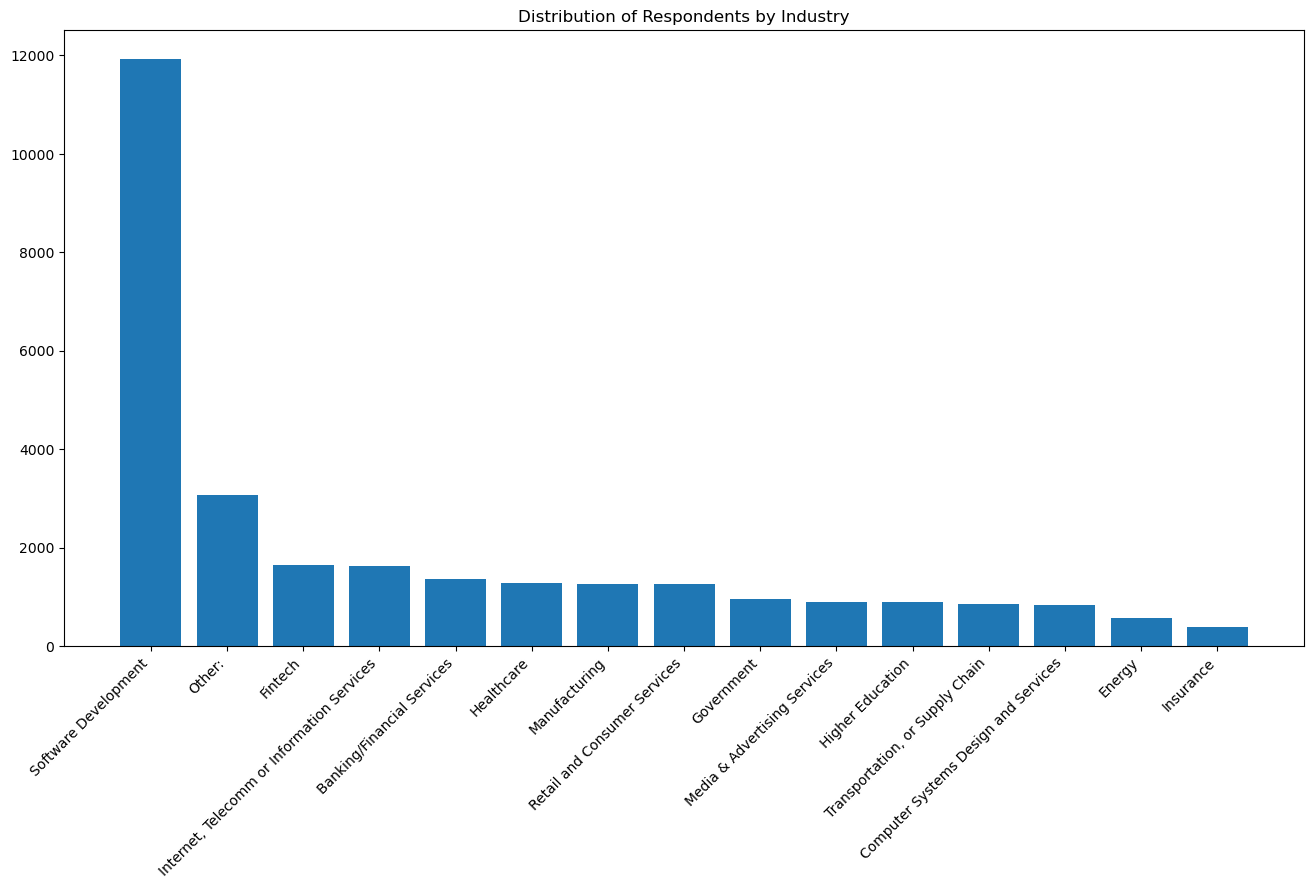

In [5]:
df.dropna(subset=['Industry'], inplace=True)
plt.figure(figsize=(16,8))
dist_ind = df['Industry'].value_counts().reset_index()
dist_ind.columns = ['Industry','count']
plt.bar(data=dist_ind, x='Industry', height='count')
plt.title('Distribution of Respondents by Industry')
plt.xticks(rotation=45, ha='right', fontsize=10);

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


 The mean is 85985.73,
 The median is 66000.00, 
 the standard deviation is 172637.56.
The threshold is = 603898.42
Number of outliers:, 63
    ConvertedCompYearly  count
0              750000.0      9
1             1000000.0      5
2              650000.0      4
3              700000.0      3
4             1200000.0      3
5             1500000.0      3
6              800000.0      2
7              636939.0      2
8              859250.0      2
9              945000.0      1
10             639000.0      1
11            1052581.0      1
12            1273879.0      1
13            1074062.0      1
14            1332930.0      1
15             660660.0      1
16           13818022.0      1
17             670000.0      1
18            2048046.0      1
19            1750749.0      1
20            6340564.0      1
21            4936778.0      1
22            1728025.0      1
23             875000.0      1
24            3367716.0      1
25            2014062.0      1
26            1562898.0

<Figure size 640x480 with 0 Axes>

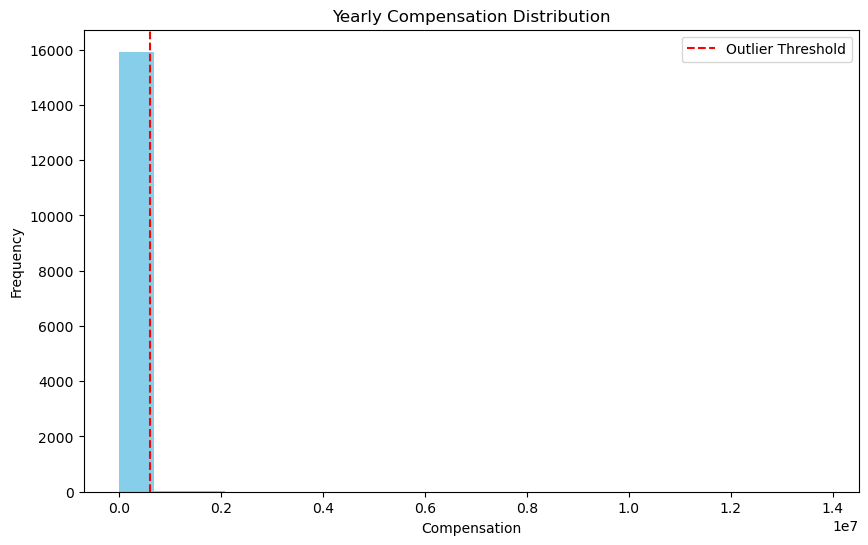

In [6]:
mean = df['ConvertedCompYearly'].mean()
median=df['ConvertedCompYearly'].median()
std = df['ConvertedCompYearly'].std()
print(f' The mean is {mean:.2f},\n The median is {median:.2f}, \n the standard deviation is {std:.2f}.')
threshold = mean + 3*std

outliers = df[df['ConvertedCompYearly']>threshold]
print(f'The threshold is = {threshold:.2f}')
print(f'Number of outliers:, {len(outliers)}')
print(outliers['ConvertedCompYearly'].value_counts().reset_index())

plt.figure()
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedCompYearly'], bins=20, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--', label='Outlier Threshold')
plt.title("Yearly Compensation Distribution")
plt.xlabel("Compensation")
plt.ylabel("Frequency")
plt.legend()
plt.show()


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


The IQR is equal to 74667.0
The outliers have an Upper bound of 220280.50 amd a Lower bound of -78387.50
The number of outliers equals 631


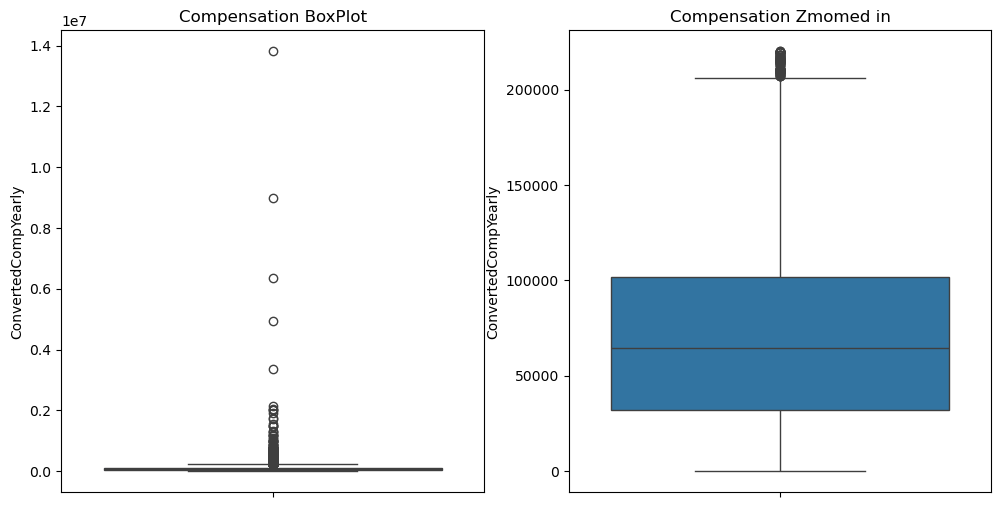

In [7]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR=Q3-Q1
print(f'The IQR is equal to {IQR}')

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(f'The outliers have an Upper bound of {upper:.2f} amd a Lower bound of {lower:.2f}')

IQR_low_outliers = df[(df['ConvertedCompYearly'] < lower)]
IQR_upper_outliers = df[(df['ConvertedCompYearly'] > upper)]
print(f'The number of outliers equals {len(IQR_upper_outliers+IQR_low_outliers)}')

fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(data=df['ConvertedCompYearly'], ax=ax[0])
ax[0].set_title('Compensation BoxPlot')

zoom = df[df['ConvertedCompYearly'] < upper]
sns.boxplot(data=zoom['ConvertedCompYearly'], ax=ax[1])
ax[1].set_title('Compensation Zmomed in')

plt.show()




<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [8]:
new_df = df[(df['ConvertedCompYearly'] >= lower) & (df['ConvertedCompYearly'] <= upper)]
new_df.shape

(15345, 114)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


                   Age  Age_numeric
72     18-24 years old         21.0
379    35-44 years old         39.5
389    25-34 years old         29.5
392    35-44 years old         39.5
398    45-54 years old         49.5
...                ...          ...
41175  18-24 years old         21.0
41178  18-24 years old         21.0
41180  25-34 years old         29.5
41184  45-54 years old         49.5
41186  18-24 years old         21.0

[15345 rows x 2 columns]


C:\Users\chris\AppData\Local\Temp\ipykernel_52308\1268037667.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Age_numeric'] = new_df['Age'].replace(Age_new)
C:\Users\chris\AppData\Local\Temp\ipykernel_52308\1268037667.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Age_numeric'] = new_df['Age'].replace(Age_new)


<Axes: >

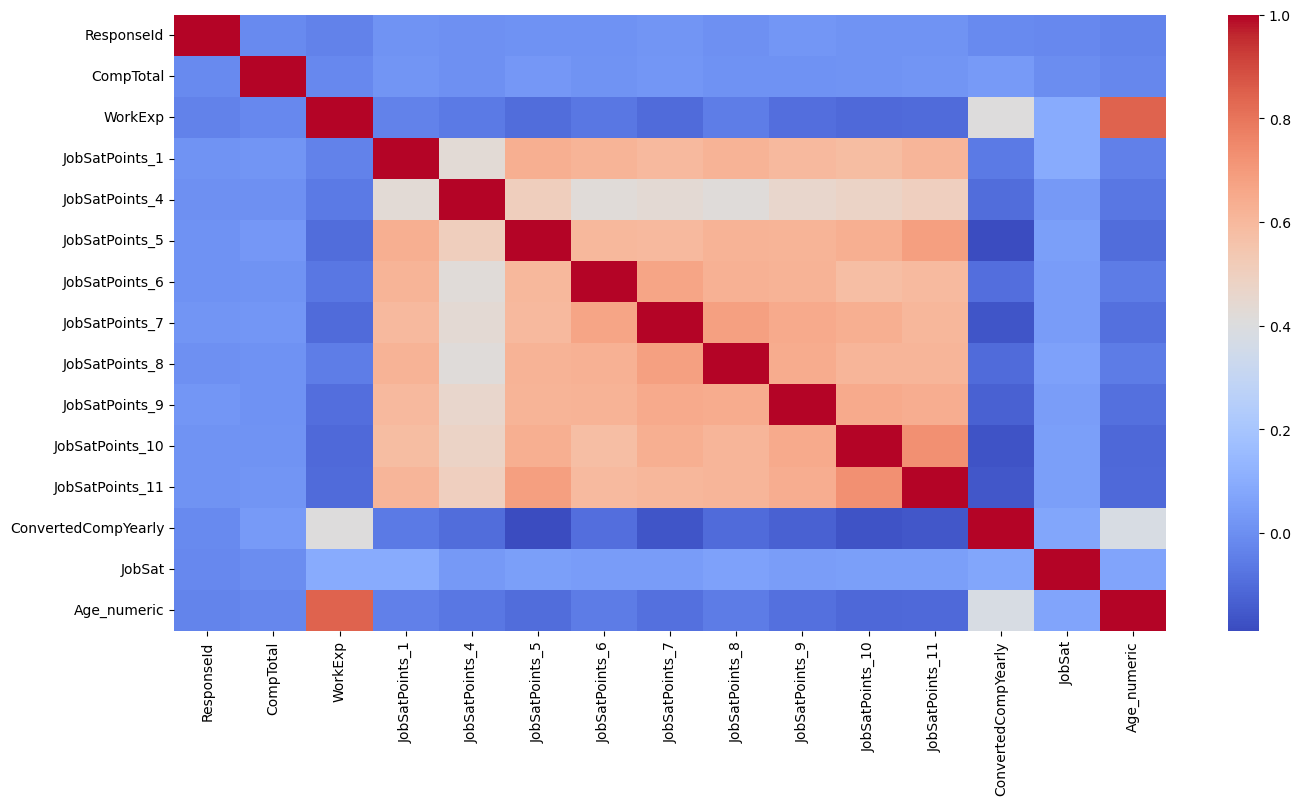

In [10]:
new_df['Age'].value_counts()
new_df.drop
Age_new = {'Under 18 years old': 16, 
           '18-24 years old': 21,
           '25-34 years old': 29.5,
           '35-44 years old': 39.5,
           '45-54 years old': 49.5,
           '55-64 years old': 59.5,
           '65 years or older': 70, 
           'Prefer not to say': None}
new_df['Age_numeric'] = new_df['Age'].replace(Age_new)
print(new_df[['Age','Age_numeric']])

corr = new_df.corr(numeric_only=True)
corr

plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap='coolwarm')

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
